# Install necessary libraries
# !pip install pandas numpy matplotlib seaborn
# Load the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'Downloads/archive (2)/archive (1)/weather_data.csv'
data = pd.read_csv(file_path)

# Data Overview

In [2]:
print("Dataset Overview:")
print(data.head())
print(data.info())

Dataset Overview:
       Location            Date_Time  Temperature_C  Humidity_pct  \
0     San Diego  2024-01-14 21:12:46      10.683001     41.195754   
1     San Diego  2024-05-17 15:22:10       8.734140     58.319107   
2     San Diego  2024-05-11 09:30:59      11.632436     38.820175   
3  Philadelphia  2024-02-26 17:32:39      -8.628976     54.074474   
4   San Antonio  2024-04-29 13:23:51      39.808213     72.899908   

   Precipitation_mm  Wind_Speed_kmh  
0          4.020119        8.233540  
1          9.111623       27.715161  
2          4.607511       28.732951  
3          3.183720       26.367303  
4          9.598282       29.898622  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Location          1000000 non-null  object 
 1   Date_Time         1000000 non-null  object 
 2   Temperature_C     1000000 n

# Data Cleaning and Preparation

In [ ]:
data.dropna(inplace=True)

# Optimize Date_Time Parsing

In [ ]:
data['Date_Time'] = pd.to_datetime(data['Date_Time'], format='%Y-%m-%d %H:%M:%S')
data.sort_values(by='Date_Time', inplace=True)

# Downsample for faster plotting if the dataset is too large

In [ ]:
if len(data) > 10000:
    data = data.sample(n=10000, random_state=42)

# Temperature Trend Analysis

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data['Date_Time'], data['Temperature_C'], label='Temperature Trend', color='blue', alpha=0.7)
plt.title('Temperature Trend Over Time')
plt.xlabel('Date_Time')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Scatter Plot of Temperature vs. Humidity

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Humidity_pct'], y=data['Temperature_C'], color='green', alpha=0.6)
plt.title('Scatter Plot: Temperature vs. Humidity')
plt.xlabel('Humidity (%)')
plt.ylabel('Temperature (°C)')
plt.tight_layout()
plt.show()

# Bar Chart for Monthly Average Temperatures

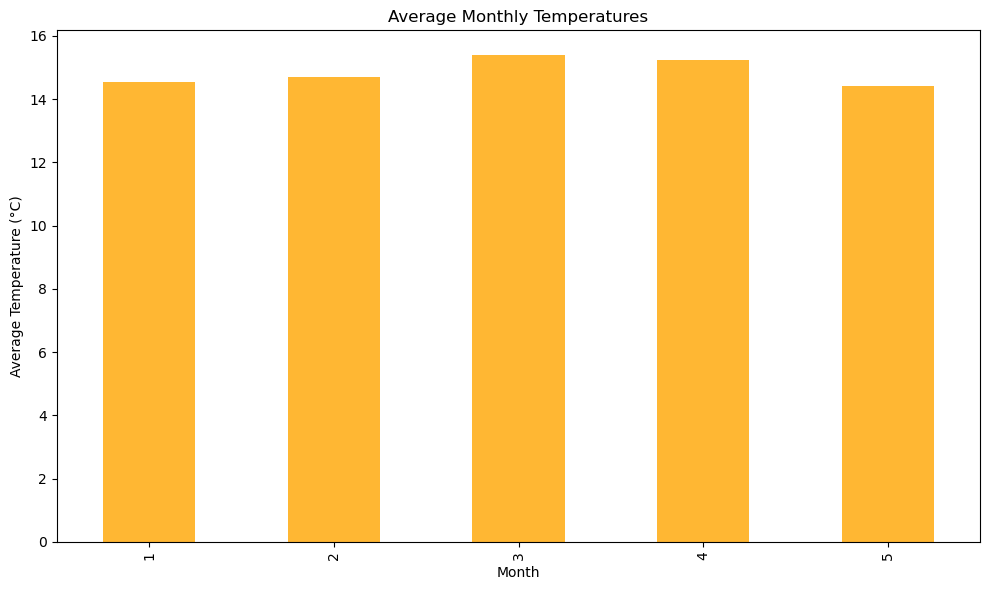

In [4]:
data['Month'] = data['Date_Time'].dt.month
monthly_avg_temp = data.groupby('Month')['Temperature_C'].mean()
plt.figure(figsize=(10, 6))
monthly_avg_temp.plot(kind='bar', color='orange', alpha=0.8)
plt.title('Average Monthly Temperatures')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.tight_layout()
plt.show()

# Identifying Extreme Temperatures

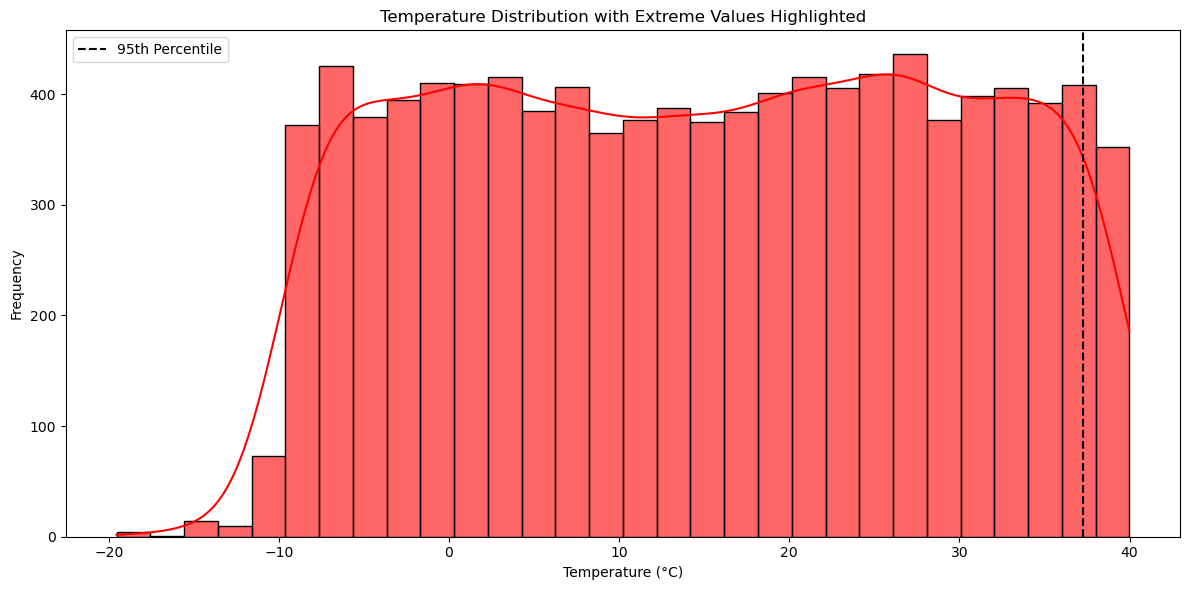

In [5]:
extreme_threshold = data['Temperature_C'].quantile(0.95)
extreme_temp_data = data[data['Temperature_C'] > extreme_threshold]
plt.figure(figsize=(12, 6))
sns.histplot(data['Temperature_C'], kde=True, color='red', bins=30, alpha=0.6)
plt.axvline(extreme_threshold, color='black', linestyle='--', label='95th Percentile')
plt.title('Temperature Distribution with Extreme Values Highlighted')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

# Correlation Heatmap

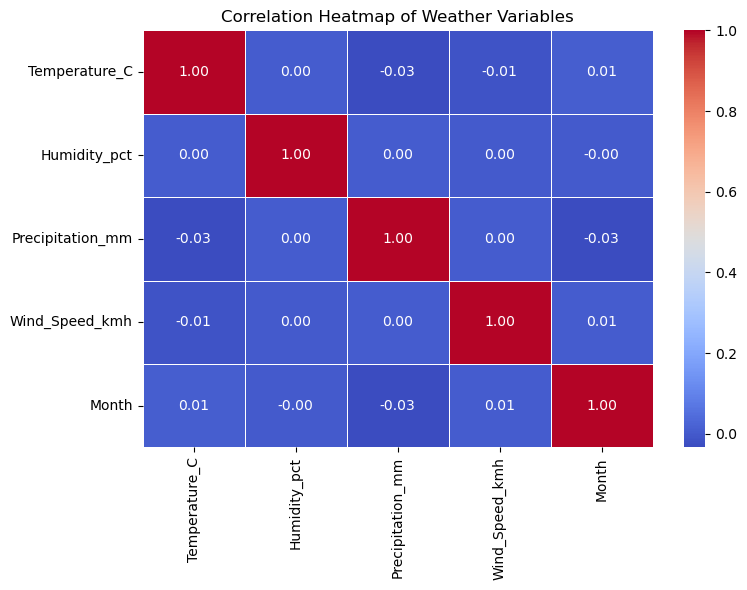

In [6]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(numeric_only=True), annot=True,cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Weather Variables')
plt.tight_layout()
plt.show()

# Additional Visualization: Wind Speed Trends

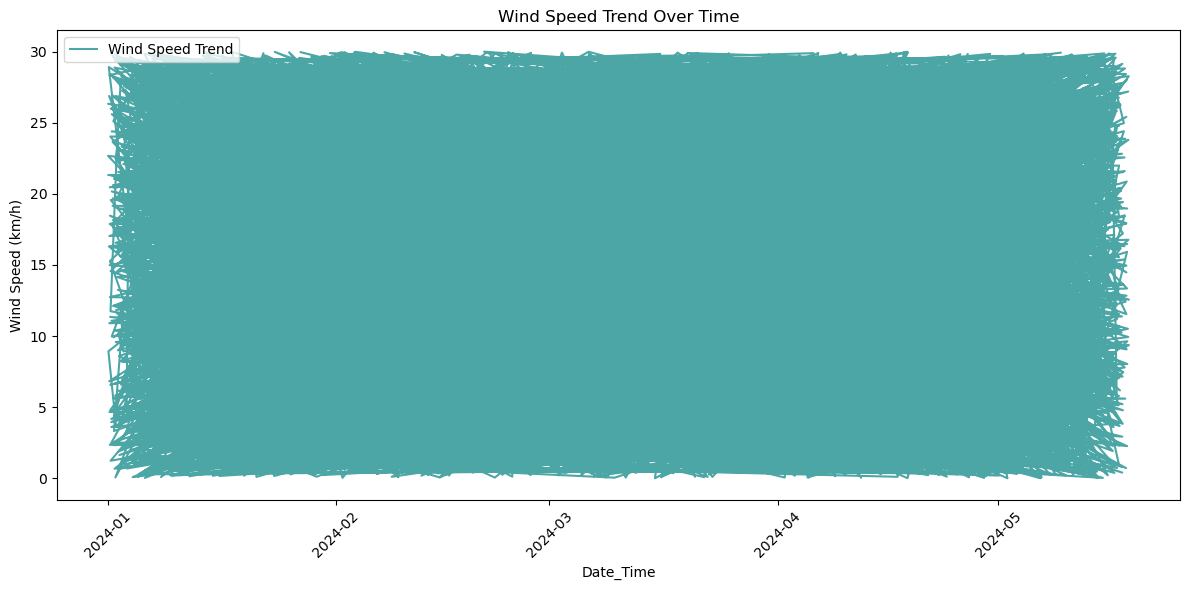

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(data['Date_Time'], data['Wind_Speed_kmh'], label='Wind Speed Trend', color='teal', alpha=0.7)
plt.title('Wind Speed Trend Over Time')
plt.xlabel('Date_Time')
plt.ylabel('Wind Speed (km/h)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Additional Visualization: Temperature Boxplot by Month

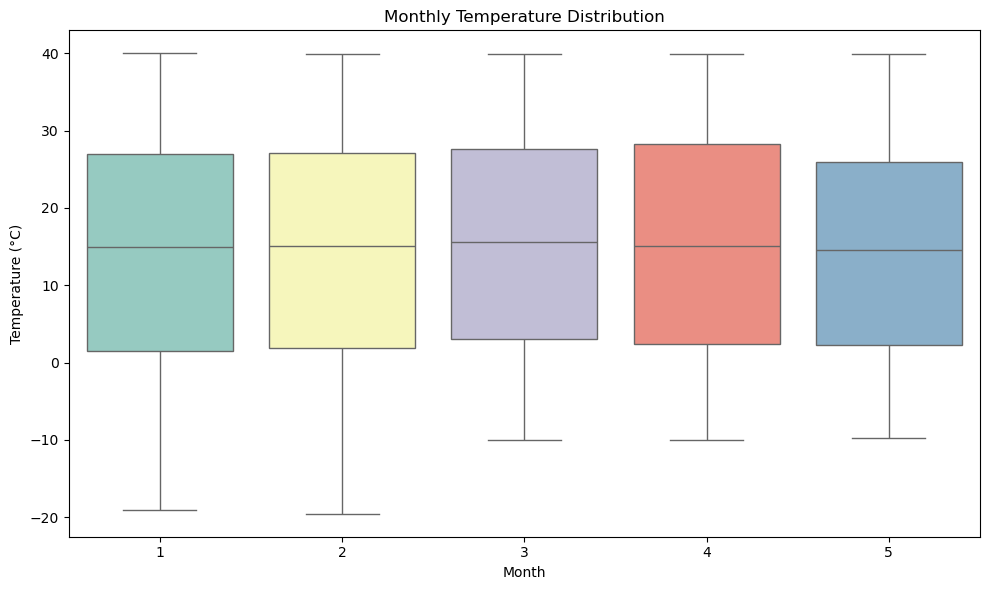

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='Temperature_C', data=data,hue='Month',legend=False, palette='Set3', showfliers=False)
plt.title('Monthly Temperature Distribution')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.tight_layout()
plt.show()

# Additional Visualization: Precipitation Trends

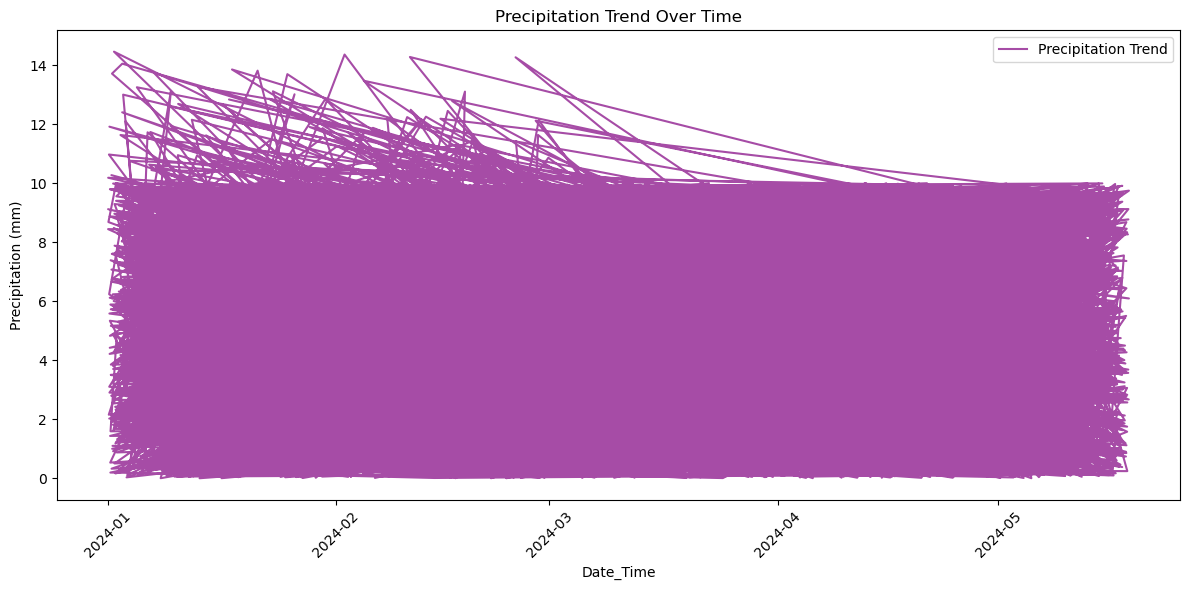

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(data['Date_Time'], data['Precipitation_mm'], label='Precipitation Trend', color='purple', alpha=0.7)
plt.title('Precipitation Trend Over Time')
plt.xlabel('Date_Time')
plt.ylabel('Precipitation (mm)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Additional Visualization: Humidity Distribution by Month

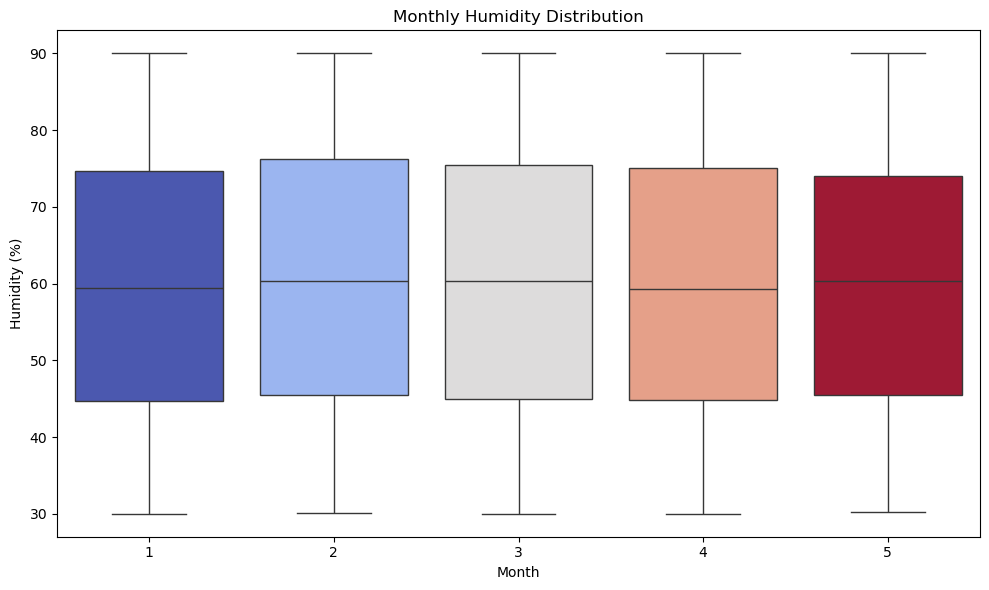

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='Humidity_pct', data=data,hue='Month',legend=False,palette='coolwarm', showfliers=False)
plt.title('Monthly Humidity Distribution')
plt.xlabel('Month')
plt.ylabel('Humidity (%)')
plt.tight_layout()
plt.show()

# Summary Statistics

In [11]:
print("Summary Statistics:")
print(data.describe())

Summary Statistics:
                           Date_Time  Temperature_C  Humidity_pct  \
count                          10000   10000.000000  10000.000000   
mean   2024-03-10 06:02:09.752399872      14.899136     60.072245   
min              2024-01-01 00:13:44     -19.542494     30.015224   
25%    2024-02-04 02:24:26.249999872       2.319952     45.042775   
50%       2024-03-10 05:49:41.500000      15.035648     59.952716   
75%    2024-04-14 07:28:50.750000128      27.292040     75.135636   
max              2024-05-18 18:25:54      39.987705     89.998486   
std                              NaN      14.469623     17.293219   

       Precipitation_mm  Wind_Speed_kmh         Month  
count      10000.000000    10000.000000  10000.000000  
mean           5.088120       15.093818      2.812200  
min            0.000812        0.004311      1.000000  
25%            2.540404        7.619118      2.000000  
50%            5.103117       15.181644      3.000000  
75%            7.58989